In [28]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc, accuracy_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
df = pd.read_csv('df_clean_class.csv', index_col = 'Name_Short')

In [3]:
df

,Emax_amylase_2.75mcgml,Emax_glucosidase_0.67mcgml,IC50_amylase,IC50_glucosidase,Bioactivity_class_amylase,Bioactivity_class_glucosidase,Alkaloids,Antaquinones,Carotenoids,flavonoids,Reducing_sugars,Saponins,Tannins,Xanthones,Bioactivity_class
Name_Short,,,,,,,,,,,,,,,
G_cowa,99.6,51.1,0.13,0.63,active,active,0,0,0,0,0,2,2,2,active_both
P_debilis,99.5,50.0,0.14,0.72,active,active,3,0,0,5,3,0,0,0,active_both
P_evecta_leaf,93.9,52.0,0.14,0.57,active,active,0,0,0,3,0,3,2,0,active_both
P_evecta_Rhizome,35.8,50.6,NaN,0.63,inactive,active,3,0,0,5,3,0,0,5,active_glucosidase
E_cuneatum,86.5,39.6,0.17,NaN,active,inactive,3,0,0,2,0,3,3,0,active_amylase
P_anamense,35.1,54.5,NaN,0.52,inactive,active,3,0,0,3,3,3,2,0,active_glucosidase
A_marginata,16.0,37.6,NaN,NaN,inactive,inactive,0,0,0,2,0,3,3,0,inactive
E_cherrevensis,77.8,39.8,0.18,NaN,active,inactive,5,0,1,2,0,3,0,0,active_amylase
F_indica,84.4,39.1,0.16,NaN,active,inactive,3,1,0,3,3,2,2,0,active_amylase


In [4]:
plant_df = df.copy()
fingerprint_to_model = plant_df[['Alkaloids', 'Antaquinones', 'Carotenoids', 'flavonoids', 'Reducing_sugars', 'Saponins', 'Tannins', 'Xanthones']]
label_to_model = plant_df.Bioactivity_class.tolist()

In [5]:
indices = fingerprint_to_model.index

In [6]:
fingerprint_to_model.head()

,Alkaloids,Antaquinones,Carotenoids,flavonoids,Reducing_sugars,Saponins,Tannins,Xanthones
Name_Short,,,,,,,,
G_cowa,0,0,0,0,0,2,2,2
P_debilis,3,0,0,5,3,0,0,0
P_evecta_leaf,0,0,0,3,0,3,2,0
P_evecta_Rhizome,3,0,0,5,3,0,0,5
E_cuneatum,3,0,0,2,0,3,3,0


In [7]:
label_to_model

['active_both',
 'active_both',
 'active_both',
 'active_glucosidase',
 'active_amylase',
 'active_glucosidase',
 'inactive',
 'active_amylase',
 'active_amylase',
 'inactive',
 'inactive',
 'inactive',
 'active_both',
 'inactive',
 'inactive',
 'inactive',
 'active_amylase',
 'active_both',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'active_amylase',
 'inactive',
 'inactive',
 'active_amylase',
 'active_amylase',
 'active_amylase',
 'inactive',
 'inactive',
 'active_glucosidase']

In [7]:
train_x, test_x, train_y, test_y, indices_train, indices_test = train_test_split(fingerprint_to_model, label_to_model, indices, test_size=0.2, random_state=42)
splits = [train_x, test_x, train_y, test_y]
# NBVAL_CHECK_OUTPUT
print("Training data size:", len(train_x))
print("Test data size:", len(test_x))

Training data size: 24
Test data size: 7


In [8]:
indices_train, indices_test

(Index(['E_succirubrum', 'P_Kesiya', 'G_cowa', 'E_cuneatum', 'R_javanica',
        'P_anamense', 'A_pulchellus', 'C_filiformis', 'D_castanea_leaf',
        'P_debilis', 'P_evecta_leaf', 'T_mucronata', 'P_evecta_Rhizome',
        'D_castanea_twig', 'D_winitii', 'G_daltonii ', 'C_oblongifolius',
        'C_tomentosa', 'E_cherrevensis', 'R_dumetorum', 'T_loureiri',
        'A_vanprukii', 'B_anceps', 'A_marginata'],
       dtype='object', name='Name_Short'),
 Index(['B_insulana', 'R_succedanea', 'L_coromandelica', 'C_formosum',
        'F_indica', 'H_perforata', 'T_triptera'],
       dtype='object', name='Name_Short'))

In [9]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
# Shuffle the indices for the k-fold cross-validation
kf = KFold(n_splits=10, shuffle=False)

In [10]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import scikitplot as skplot

model_RF = RandomForestClassifier(n_estimators=100, random_state=42)
model_RF.fit(train_x, train_y)


RandomForestClassifier(random_state=42)

In [11]:
scores=cross_val_score(model_RF, train_x, train_y, cv=kf)
avg_score = np.mean(scores)
sd_score = np.std(scores)
print(f'CV_score = {scores}')
print(f'CV_mean = {avg_score}')
print(f'CV_sd = {sd_score}')

CV_score = [0.33333333 0.33333333 0.33333333 0.         0.5        0.5
 1.         0.5        1.         0.5       ]
CV_mean = 0.5
CV_sd = 0.2886751345948129


accuracy score = 0.5714285714285714


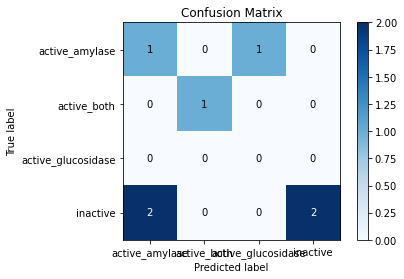

In [12]:
y_pred = model_RF.predict(test_x)
y_pred
accuracy_score = accuracy_score(test_y, y_pred, normalize=True)
print(f'accuracy score = {accuracy_score}')
skplot.metrics.plot_confusion_matrix(test_y, y_pred)
plt.show()

In [87]:
Bioactivity_class = []
for i in df.Bioactivity_class:
    if i in {'active_both', 'active_glucosidase', 'active_amylase'}:
        Bioactivity_class.append("active")
    else:
        Bioactivity_class.append("inactive")

In [88]:
len(Bioactivity_class)

31

In [89]:
Bioactivity_class

['active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'inactive',
 'active',
 'active',
 'inactive',
 'inactive',
 'inactive',
 'active',
 'inactive',
 'inactive',
 'inactive',
 'active',
 'active',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'active',
 'inactive',
 'inactive',
 'active',
 'active',
 'active',
 'inactive',
 'inactive',
 'active']

In [90]:
label_to_model = Bioactivity_class

In [91]:
train_x, test_x, train_y, test_y, indices_train, indices_test = train_test_split(fingerprint_to_model, label_to_model, indices, test_size=0.2, random_state=42)
splits = [train_x, test_x, train_y, test_y]
# NBVAL_CHECK_OUTPUT
print("Training data size:", len(train_x))
print("Test data size:", len(test_x))

Training data size: 24
Test data size: 7


In [92]:
indices_train, indices_test

(Index(['E_succirubrum', 'P_Kesiya', 'G_cowa', 'E_cuneatum', 'R_javanica',
        'P_anamense', 'A_pulchellus', 'C_filiformis', 'D_castanea_leaf',
        'P_debilis', 'P_evecta_leaf', 'T_mucronata', 'P_evecta_Rhizome',
        'D_castanea_twig', 'D_winitii', 'G_daltonii ', 'C_oblongifolius',
        'C_tomentosa', 'E_cherrevensis', 'R_dumetorum', 'T_loureiri',
        'A_vanprukii', 'B_anceps', 'A_marginata'],
       dtype='object', name='Name_Short'),
 Index(['B_insulana', 'R_succedanea', 'L_coromandelica', 'C_formosum',
        'F_indica', 'H_perforata', 'T_triptera'],
       dtype='object', name='Name_Short'))

accuracy score = 0.5714285714285714


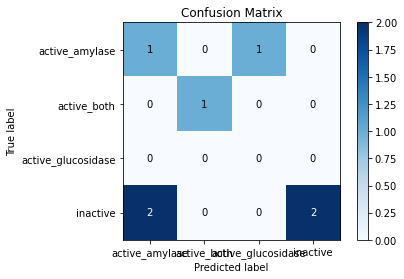

In [16]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import scikitplot as skplot

model_RF = RandomForestClassifier(n_estimators=100, random_state=42)
model_RF.fit(train_x, train_y)
y_pred = model_RF.predict(test_x)
y_pred
accuracy_score = accuracy_score(test_y, y_pred, normalize=True)
print(f'accuracy score = {accuracy_score}')
skplot.metrics.plot_confusion_matrix(test_y, y_pred)
plt.show()

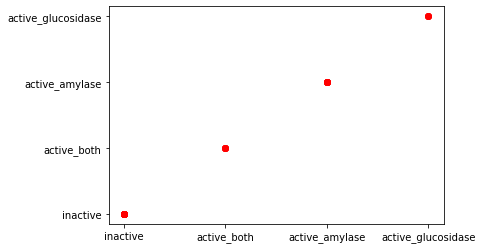

In [17]:
y_pred_train = model_RF.predict(train_x)
plt.scatter(train_y, y_pred_train, c='red')

In [18]:
scores=cross_val_score(model_RF, train_x, train_y, cv=kf)
avg_score = np.mean(scores)
sd_score = np.std(scores)
print(avg_score)
print(sd_score)

0.5
0.2886751345948129


In [206]:
plant_df = df.copy()
fingerprint_to_model = plant_df[['Alkaloids', 'Antaquinones', 'Carotenoids', 'flavonoids', 'Reducing_sugars', 'Saponins', 'Tannins', 'Xanthones']]
label_to_model = plant_df.Bioactivity_class.tolist()

In [101]:
train_x, test_x, train_y, test_y, indices_train, indices_test = train_test_split(fingerprint_to_model, label_to_model, indices, test_size=0.2, random_state=42)
splits = [train_x, test_x, train_y, test_y]
# NBVAL_CHECK_OUTPUT
print("Training data size:", len(train_x))
print("Test data size:", len(test_x))

Training data size: 24
Test data size: 7


In [207]:
df['Bioactivity_class_number'] = df['Bioactivity_class'].map({'active_both': 3, 'active_glucosidase': 2, 'active_amylase': 1, 'inactive': 0})
df.head()

,Emax_amylase_2.75mcgml,Emax_glucosidase_0.67mcgml,IC50_amylase,IC50_glucosidase,Bioactivity_class_amylase,Bioactivity_class_glucosidase,Alkaloids,Antaquinones,Carotenoids,flavonoids,Reducing_sugars,Saponins,Tannins,Xanthones,Bioactivity_class,cluster,Bioactivity_class_number
Name_Short,,,,,,,,,,,,,,,,,
G_cowa,99.6,51.1,0.13,0.63,active,active,0,0,0,0,0,2,2,2,active_both,1,3
P_debilis,99.5,50.0,0.14,0.72,active,active,3,0,0,5,3,0,0,0,active_both,2,3
P_evecta_leaf,93.9,52.0,0.14,0.57,active,active,0,0,0,3,0,3,2,0,active_both,1,3
P_evecta_Rhizome,35.8,50.6,NaN,0.63,inactive,active,3,0,0,5,3,0,0,5,active_glucosidase,3,2
E_cuneatum,86.5,39.6,0.17,NaN,active,inactive,3,0,0,2,0,3,3,0,active_amylase,0,1


In [44]:
df.to_csv('df_clean_class_number.csv')

In [208]:
plant_df = df.copy()
fingerprint_to_model = plant_df[['Alkaloids', 'Antaquinones', 'Carotenoids', 'flavonoids', 'Reducing_sugars', 'Saponins', 'Tannins', 'Xanthones']]
label_to_model = plant_df.Bioactivity_class.tolist()

In [209]:
train_x, test_x, train_y, test_y, indices_train, indices_test = train_test_split(fingerprint_to_model, label_to_model, indices, test_size=0.2, random_state=42)
splits = [train_x, test_x, train_y, test_y]
# NBVAL_CHECK_OUTPUT
print("Training data size:", len(train_x))
print("Test data size:", len(test_x))

Training data size: 24
Test data size: 7


In [210]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4)
scores=cross_val_score(model, train_x, train_y, cv=kf)
avg_score = np.mean(scores)
sd_score = np.std(scores)
print(scores)
print('mean (%) = {:.3f}'.format(avg_score*100))
print('sd (%) = {:.3f}'.format(sd_score*100))

[0.  0.  0.  0.  0.5 0.  0.  0.  0.  0.5]
mean (%) = 10.000
sd (%) = 20.000


In [212]:
model.fit(train_x, train_y)
y_pred = model.predict(test_x)
model.score(test_x, test_y)

0.14285714285714285

/Users/tarapongsrisongkram/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarapongsrisongkram/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarapongsrisongkram/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

    active_amylase       0.00      0.00      0.00         2
       active_both       1.00      1.00      1.00         1
active_glucosidase       0.00      0.00      0.00         0
          inactive       0.00      0.00      0.00         4

          accuracy                           0.14         7
         macro avg       0.25      0.25      0.25         7
      weighted avg       0.14      0.14      0.14         7



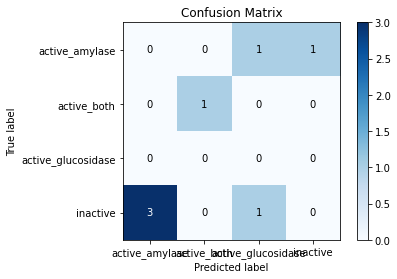

In [221]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(test_y, y_pred))
skplot.metrics.plot_confusion_matrix(test_y, y_pred)
plt.show()

In [224]:
from sklearn.metrics import auc, accuracy_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score

test_prob = model.predict_proba(test_x)[:, 1]
# Prediction class on test set
test_pred = model.predict(test_x)
# Compute False postive rate and True positive rate
fpr, tpr, thresholds = metrics.roc_curve(test_y, test_prob)
# Calculate Area under the curve to display on the plot
auc = roc_auc_score(test_y, test_prob)
# Plot the computed values
ax.plot(fpr, tpr, label=(f"{model['label']} AUC area = {auc:.2f}"))
ax.plot([0, 1], [0, 1], "r--")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("Receiver Operating Characteristic")
ax.legend(loc="lower right")

NameError: name 'metrics' is not defined

In [160]:
print(label_to_model)

[3, 3, 3, 2, 1, 2, 0, 1, 1, 0, 0, 0, 3, 0, 0, 0, 1, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 2]


In [161]:
fingerprint_to_model_KMean = plant_df[['Alkaloids', 'Antaquinones', 'Carotenoids', 'flavonoids', 'Reducing_sugars', 'Saponins', 'Tannins', 'Xanthones']]

In [162]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
y_pred = model.fit_predict(fingerprint_to_model_KMean)

In [163]:
df['cluster'] = y_pred

In [164]:
df.head()

,Emax_amylase_2.75mcgml,Emax_glucosidase_0.67mcgml,IC50_amylase,IC50_glucosidase,Bioactivity_class_amylase,Bioactivity_class_glucosidase,Alkaloids,Antaquinones,Carotenoids,flavonoids,Reducing_sugars,Saponins,Tannins,Xanthones,Bioactivity_class,cluster,Bioactivity_class_number
Name_Short,,,,,,,,,,,,,,,,,
G_cowa,99.6,51.1,0.13,0.63,active,active,0,0,0,0,0,2,2,2,active_both,1,3
P_debilis,99.5,50.0,0.14,0.72,active,active,3,0,0,5,3,0,0,0,active_both,2,3
P_evecta_leaf,93.9,52.0,0.14,0.57,active,active,0,0,0,3,0,3,2,0,active_both,1,3
P_evecta_Rhizome,35.8,50.6,NaN,0.63,inactive,active,3,0,0,5,3,0,0,5,active_glucosidase,3,2
E_cuneatum,86.5,39.6,0.17,NaN,active,inactive,3,0,0,2,0,3,3,0,active_amylase,0,1


In [141]:
pvt = df.pivot_table(index='Name_Short', columns=['cluster'], values='Bioactivity_class', fill_value=0, aggfunc='count')

In [178]:
pvt.head()

cluster,0,1,2,3
Name_Short,,,,
A_marginata,0,0,0,1
A_pulchellus,1,0,0,0
A_vanprukii,1,0,0,0
B_anceps,0,0,0,1
B_insulana,0,1,0,0


In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [41]:
models = []
models.append(('kNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('RF', RandomForestClassifier(random_state=42)))
models.append(('DT', DecisionTreeClassifier()))

results = []
names = []
for name, model in models:
    cvs = cross_val_score(model, train_x, train_y, cv=kf)
    results.append(cvs)
    names.append(name)
    print('{:4} {:.3f} ({:.3f})'.format(name, cvs.mean(), cvs.std()))
    

kNN  0.233 (0.238)
NB   0.333 (0.325)
SVC  0.500 (0.325)
RF   0.500 (0.289)
DT   0.383 (0.308)


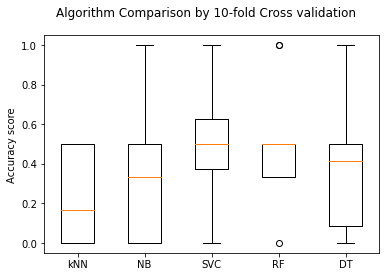

In [42]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison by 10-fold Cross validation')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_ylabel('Accuracy score')
plt.show()